In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [6]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [7]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [8]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

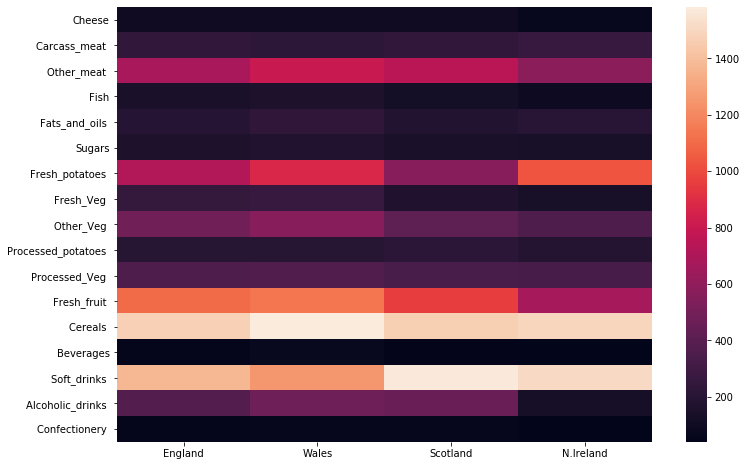

In [10]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(df)

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [15]:
encoderModel = Sequential([
    Dense(8, activation='relu', input_shape=[17]),
    Dense(4, activation='relu'),
    Dense(2, activation='relu')
])

**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [16]:
decoderModel = Sequential([
    Dense(4, activation='relu', input_shape=[2]),
    Dense(8, activation='relu'),
    Dense(17, activation='relu')
])

**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [18]:
autoencoder = Sequential([encoderModel, decoderModel])

In [27]:
autoencoder.compile(loss='mse', optimizer=SGD(1.5))

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [31]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [32]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 2ms/step - loss: 0.4191
Epoch 2/15
1/1 [==============================] - 0s 2ms/step - loss: 0.3740
Epoch 3/15
1/1 [==============================] - 0s 1ms/step - loss: 0.3048
Epoch 4/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2707
Epoch 5/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 6/15
1/1 [==============================] - 0s 1ms/step - loss: 0.2469
Epoch 7/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 8/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2246
Epoch 9/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2189
Epoch 11/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 12/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2507
Epoch 13/15
1/1 [==============================] - 0s 2ms/step - loss: 0.

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [41]:
encoded_2dmin = encoderModel.predict(scaled_df)

In [42]:
encoded_2dmin

array([[-0.       ,  1.4338772],
       [-0.       ,  1.6979437],
       [-0.       ,  1.1923957],
       [-0.       , -0.       ]], dtype=float32)

array([[1.0482036 , 0.        ],
       [1.2070727 , 0.        ],
       [1.1669513 , 0.        ],
       [0.05854838, 0.        ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [44]:
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [45]:
res = pd.DataFrame(data=encoded_2dmin, index=df.columns, columns= ['C1', 'C2'])

In [46]:
res

,C1,C2
England,-0.0,1.433877
Wales,-0.0,1.697944
Scotland,-0.0,1.192396
N.Ireland,-0.0,-0.000000


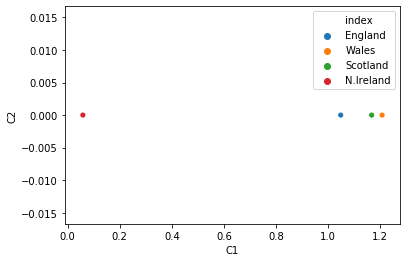